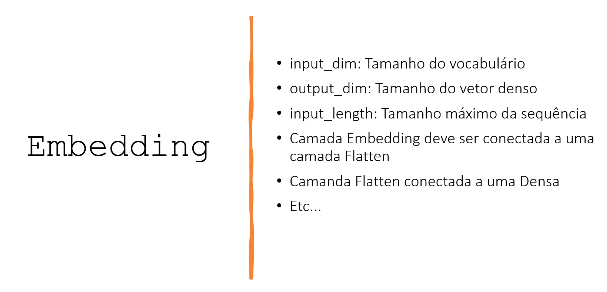

In [1]:
# Importação das bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential   # conjunto de camadas sequenciais
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
# Importação do arquivo
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [3]:
# Criação um objeto dataframe
spam = pd.read_csv('spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Exibição da dimensão do dataframe
spam.shape

(5572, 2)

In [5]:
# Exibição do número de elementos de cada categoria
spam.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
# Transformação da coluna categoria em número (variável dependente)
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(spam['Category'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
# Variável independente
mensagens = spam['Message'].values      # transformação do objeto do pandas em objeto do numpy

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size = 0.3)

In [10]:
# Tokenização do texto
token = Tokenizer(num_words=1000)           # num_words=1000 :: indica o número máximo de palavras que será mantido
token.fit_on_texts(X_train)                 # criação do modelo
X_train = token.texts_to_sequences(X_train) # transformação do texto de treino
X_test = token.texts_to_sequences(X_test)   # transformação do texto de teste

In [11]:
# nº de palavras de treino
len(X_train)

3900

In [12]:
# Padding (garante que as sequências de texto criadas possuam o mesmo tamanho)
X_train = pad_sequences(X_train, padding='post', maxlen=500)
X_test = pad_sequences(X_test, padding='post', maxlen=500)

# padding: informa para que lado haverá o preenchimento de zeros (antes ou depois)
# maxlen: tamanho máximo de vetor permitido (nº máximo de palavras permitido em cada vetor).
  # Se tiver mais que o nº indicado, haverá o truncamento. Contudo, se tiver menos que o indicado, haverá o preenchimento com zeros posteriormente

In [13]:
# nº de palavras de treino
len(X_train)

3900

In [14]:
len(token.word_index)

7493

In [15]:
# Montagem da arquitetura da rede neural
modelo = Sequential()                                                         # Criação de uma variável modelo com o objeto Sequential instanciado (para iniciar a montagem das camadas)

modelo.add(Embedding(input_dim=len(token.word_index), output_dim=50,input_length=500))  # Montagem da camada de embedding
                                                                                        # input_dim: tamanho do vocabulário
                                                                                        # Propriedade word_index: mostra o comprimento do token (mostra o nº de palavras existentes dentro do vocabulário)
                                                                                        # output_dim: mostra o tamanho do retorno
                                                                                        # input_length: comprimento da sequência

modelo.add(Flatten())                                                         # Montagem da camada flatten (faz a conexão entre a camada de embedding e a camada densa)

modelo.add(Dense(units=10, activation='relu'))                                # Montagem da 1ª densa
                                                                              # units=10 :: nº de neurônios (escolha arbitrária)
                                                                              # activation='relu' :: função de ativação

modelo.add(Dropout(0.1))                                                      # Montagem da camada de dropout (evita overfitting)
                                                                              # Remove algumas sinapses (conexões entre neurônios de camadas diferentes)

modelo.add(Dense(units=1, activation='sigmoid'))                              # Montagem da camada de saída
                                                                              # A escolha do nº de neurônios corresponde ao número de saídas
                                                                              # units=1 :: retorna 1 valor que é a probabilidade entre 0 e 1

In [16]:
# Compilação do modelo
modelo.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
modelo.summary()

# loss: função de perda (diferença entre o que foi previsto e o que foi observado)
# optimizer: função que otimiza o ajuste dos pesos
# backpropagation: processo de ajuste da rede
# metrics: métrica utilizada para avaliação do desempenho da rede

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           374650    
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense (Dense)               (None, 10)                250010    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 624671 (2.38 MB)
Trainable params: 624671 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Treinamento da rede neural
modelo.fit(X_train, y_train, epochs=20, batch_size=10, verbose=True, validation_data=(X_test, y_test))

# Todos os registros de X_train serão passadas pela rede a cada epoch
# epoch: nº de vezes que o modelo é executado
# batch_size: nº de exemplos de treinamento usados a cada iteração do modelo
# verbose=True :: fornece feedback interativo a cada processo de treinamento
# validation_date: dados de teste

Epoch 1/20
390/390 [==============================] - 9s 19ms/step - loss: 0.0502 - accuracy: 0.9392 - val_loss: 0.0140 - val_accuracy: 0.9856
Epoch 2/20
390/390 [==============================] - 5s 12ms/step - loss: 0.0148 - accuracy: 0.9877 - val_loss: 0.0139 - val_accuracy: 0.9839
Epoch 3/20
390/390 [==============================] - 5s 13ms/step - loss: 0.0094 - accuracy: 0.9897 - val_loss: 0.0116 - val_accuracy: 0.9862
Epoch 4/20
390/390 [==============================] - 5s 13ms/step - loss: 0.0090 - accuracy: 0.9933 - val_loss: 0.0105 - val_accuracy: 0.9880
Epoch 5/20
390/390 [==============================] - 5s 12ms/step - loss: 0.0065 - accuracy: 0.9954 - val_loss: 0.0100 - val_accuracy: 0.9886
Epoch 6/20
390/390 [==============================] - 5s 14ms/step - loss: 0.0065 - accuracy: 0.9959 - val_loss: 0.0106 - val_accuracy: 0.9880
Epoch 7/20
390/390 [==============================] - 5s 12ms/step - loss: 0.0052 - accuracy: 0.9972 - val_loss: 0.0104 - val_accuracy: 0.9880

In [18]:
# Métricas de avaliação do modelo
loss, accuracy = modelo.evaluate(X_test, y_test)

53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9856


In [19]:
# Previsão de novas mensagems
nova_previsao = modelo.predict(X_test)
nova_previsao

# Como foi usada a função de ativação sigmoid na camada de saída, a previsão é um número entre 0 e 1

53/53 [==============================] - 1s 6ms/step


array([[3.69782896e-07],
       [7.53060903e-08],
       [4.14451007e-09],
       ...,
       [1.17176405e-07],
       [9.91946636e-10],
       [9.11150437e-06]], dtype=float32)

In [20]:
# Mostrando as classes que foram previstas
prev = (nova_previsao > 0.5)
prev

# Valor True :: a mensagem é classificada como spam
# Valor False :: a mensagem não é classificada como spam

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [21]:
# Matriz de confusão
confusion_matrix(y_test, prev)

array([[1438,    9],
       [  15,  210]])